### Overview Dataset

"Data Komponen Beton".

Data set ini berisikan beberapa kategori sebagai berikut
* cement (kg)
* slag (blast furnace slag, kg)
* ash (fly ash, kg)
* water (kg)
* superplastic (superplasticizer, kg)
* coarseagg (coarse aggregate, kg)
* fineagg (fine aggregate, kg)
* age (days, 1-365)
* strength (Concrete compressive strength, MPa)

# Exploratory Data Analysis (EDA)


# Instruksi Tugas Praktikum FIKTI dan FTI

1. Buat univariate dan bivariate analysis untuk data set di atas
2. Jelaskan kesimpulan yang bisa di ambil dari analysis yg anda lakukan


<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
import random

## 1.2 Import data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv")
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


# 2. EDA

## 2.1.Univariate analysis
<a id="2"></a>

## 2.1.1 Cement

### **i.	Distribusi**

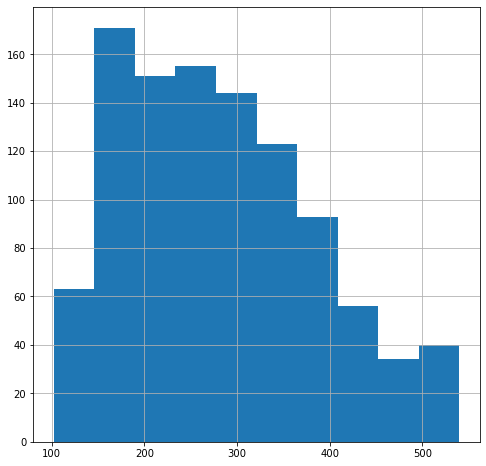

In [3]:
data['cement'].hist(figsize=(8,8))
plt.show()

In [4]:
data[data["cement"]>70].shape

(1030, 9)

### **ii.	Deskripsi**

Histogram di atas menjelaskan bahwa :
*  atribut "cement" tidak simetris.
*  pada histogram 100-160 mengalami kenaikan signifikan
*  cement minimum dan maksimum adalah 101 kg dan 540 kg.
*  Dataset ini memiliki pengamatan (1030) tentang cement tertentu, yaitu 540 kg.

## 2.1.2 Water

### **i.	Distribusi**

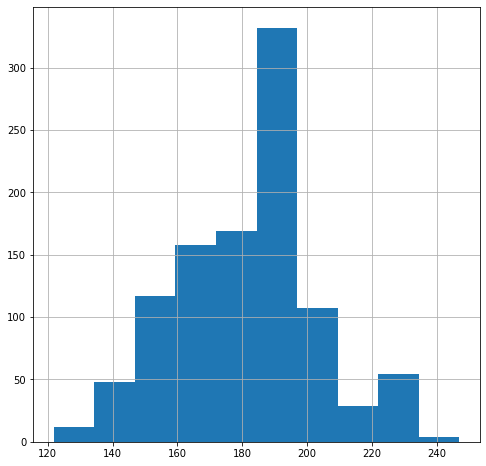

In [5]:
data['water'].hist(figsize=(8,8))
plt.show()

In [6]:
data[data["water"]>70].shape

(1030, 9)

### **ii. Deskripsi**

Histogram di atas menjelaskan bahwa :
*  atribut "water" hampir simetris.
*  pada histogram 180-190 mengalami kenaikan signifikan.
*  water minimum dan maksimum adalah 122 Kg dan 250 Kg.
*  Dataset ini memiliki pengamatan (1030) tentang water tertentu, yaitu 250 Kg.

<a id="3"></a>
# 2.2.Bivariate analysis

## 2.2.1 Cement - Water (Hubungan)

### i. **Boxplot**

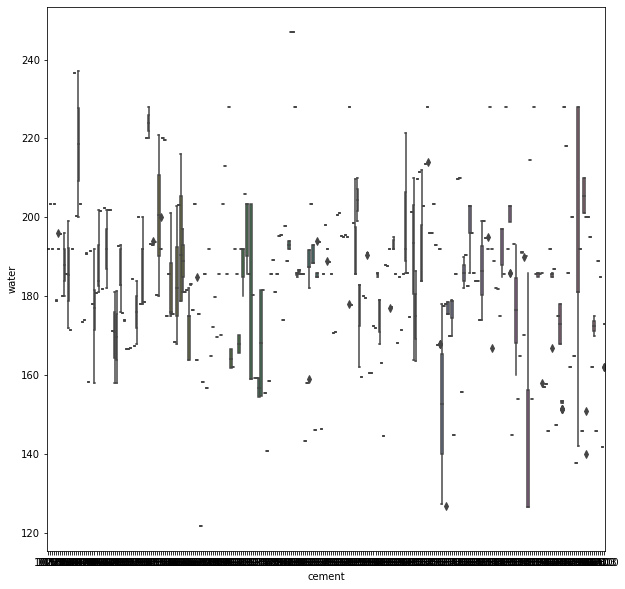

In [7]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="cement", y="water", data=data)
plt.show()

In [8]:
print("describe cement: ",data.cement.describe())

describe cement:  count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64


In [9]:
print("describe water: ",data.water.describe())

describe water:  count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64


### ii. Deskripsi

*  rerata nilai cement pada beton adalah 281.167 Kg dengan water 181.567 Kg
*  nilai minimal cement pada beton adalah 102 Kg dengan water 121.8 Kg
*  nilai cement pada beton pada 25% adalah 192.375 Kg dengan water 164.9 Kg
*  nilai cement pada beton pada 50% adalah 272.9 Kg dengan water 185 Kg
*  nilai cement pada beton pada 75% adalah 350 Kg dengan water 192 Kg
*  nilai maksimal cement pada beton adalah 540 Kg dengan water 247 Kg

### iii. Uji Hipotesis
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


In [10]:
ttest,pval = ttest_ind(data.cement,data.water,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest 29.967843157851238
p value 3.267715932044859e-145
null hypothesis ditolak


### iv. Kesimpulan akhir

*  Semakin tinggi perbandingan campuran air dan bahan material semen maka konstruksi beton malah semakin jelek. Untuk meningkatkan mutu konstruksi beton rumah harus mengurangi perbandingan air dan bahan material semen.

*  Faktor air dan bahan material semen adalah perbandingan antara berat air dibandingkan dengan berat bahan material semen. 